In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the data into notebook
- Data is in CSV form
- use pd.read_csv to load the data

In [3]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### descriptive analysis
- using describe function we will get further information about data
- we will plot histograms of each data

In [5]:
data.shape

(20640, 10)

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


#### inference of the descriptive statistics
- all counts are 20640 except for total_bedrooms
- which means total_bedrooms contains NaN values
- except for above inference the data looks satisfactory

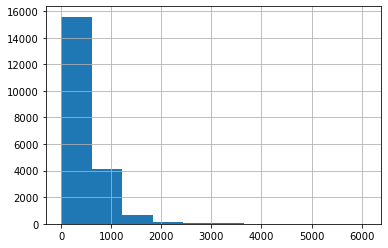

In [7]:
data["households"].hist()
plt.show()

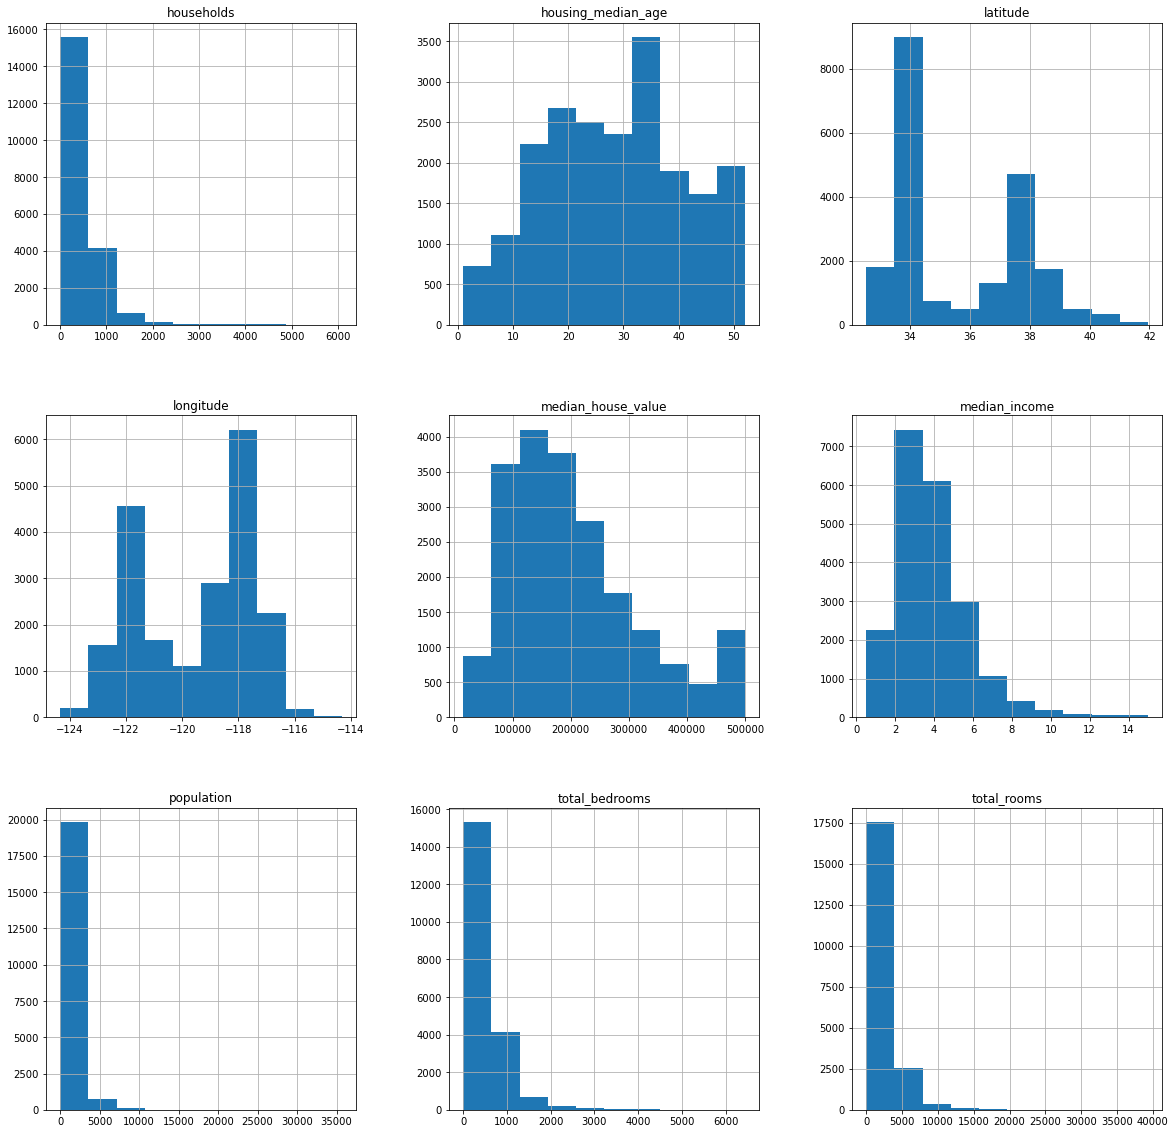

In [8]:
data.hist(figsize=(20,20))
plt.show()

### inferences from histograms
- looking at households, population, total_rooms, total_bedrooms we can say there are more sparsly populated areas than densely populated areas
- looking at histograms of lattitude and longitude we can say that there are 2 major locations in the city

- to confirm the inference about locations let us plot scatter plot for locations

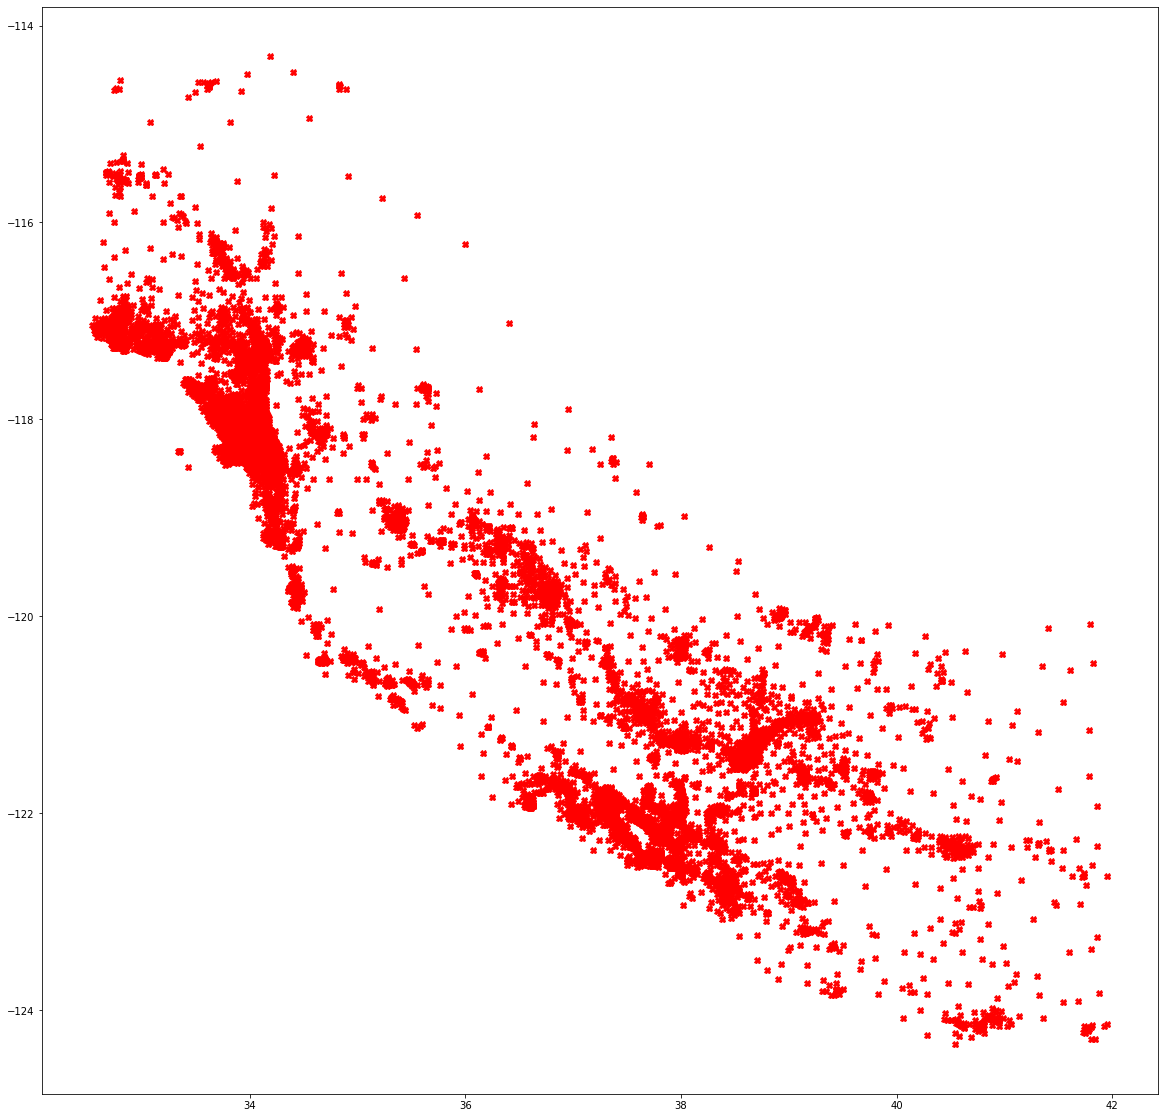

In [9]:
plt.figure(figsize=(20,20))
plt.plot(data["latitude"].values,data["longitude"].values,"rX")
plt.show()

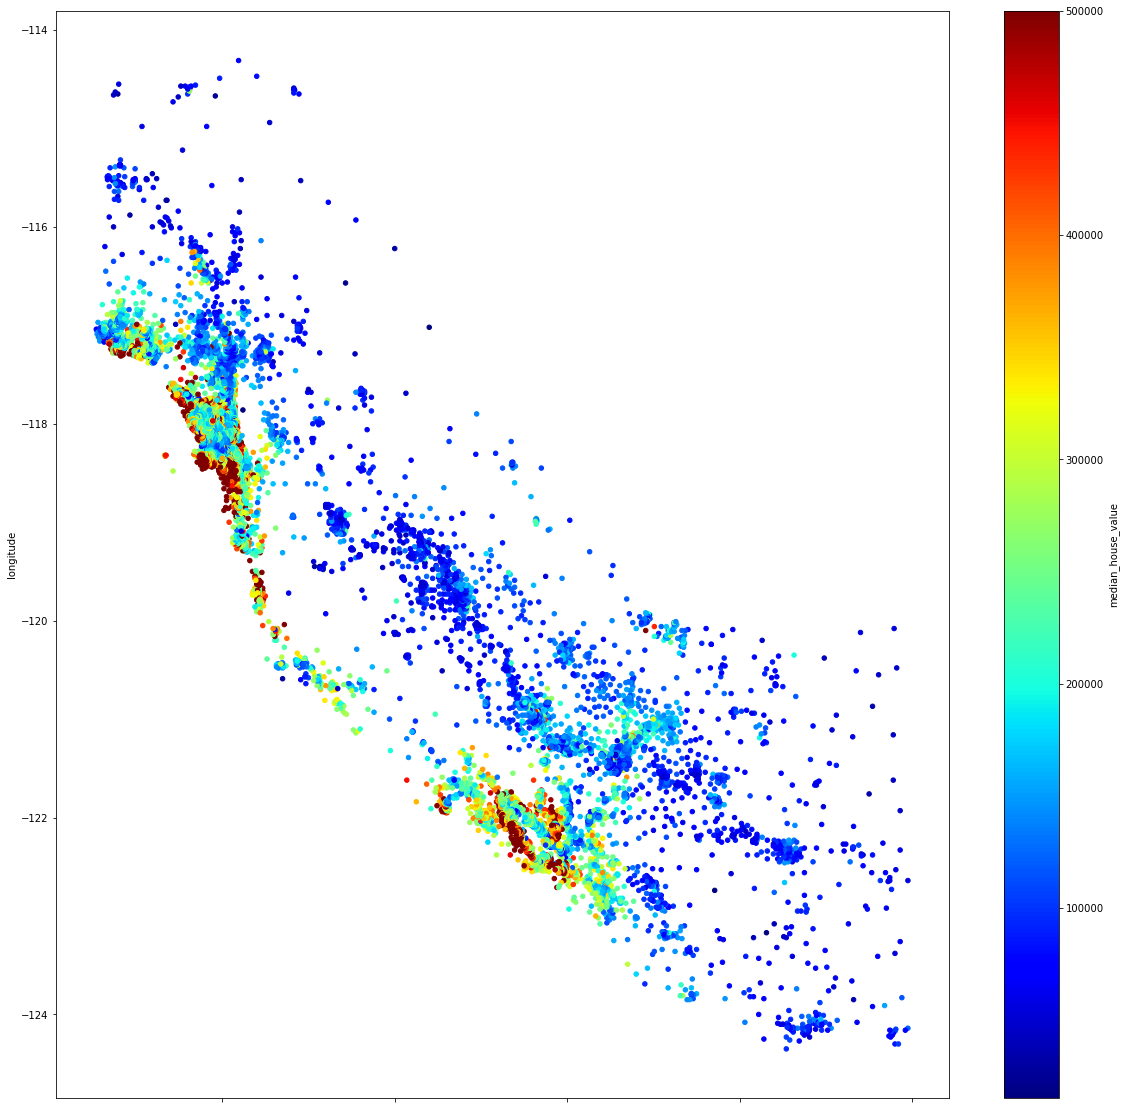

In [10]:
# plt.figure()
data.plot(kind="scatter",x="latitude",y="longitude",c="median_house_value",cmap=plt.get_cmap("jet"),figsize=(20,20))
plt.show()

- with the location and price graph we can conclude that house price has nothing to do with city center however closer it is to the ocean costlier it is.

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
# remove latitude and longitude
data = data.iloc[:,2:]
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
# arrange the uniqe values in Deending order
l = ['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND' ]


In [15]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
l.index("NEAR BAY")

2

In [17]:

def convert(x):
    return l.index(x)+1
convert("NEAR BAY")

3

In [18]:
data["ocean_proximity"] = data["ocean_proximity"].apply(convert)

In [19]:
data[data["total_bedrooms"].isna()]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,3
341,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,3
538,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,3
563,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,3
696,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,3
...,...,...,...,...,...,...,...,...
20267,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,2
20268,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,2
20372,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,4
20460,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,4


In [20]:
data = data.dropna()

In [21]:
data.shape

(20433, 8)

In [22]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [23]:
from sklearn.preprocessing import MinMaxScaler
# train test split
X = data[["housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]]
Y = data["median_house_value"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
predicted = model.predict(x_test)

In [28]:
#MSE value
MSE = ((y_test-predicted)**2).mean()
MSE

5085101274.368294

In [29]:
MSE = ((y_test-predicted)**2).mean()
MSE

5085101274.368294

In [30]:
RMSE = MSE**0.5
RMSE

71309.89604794199

In [31]:
MAE = (np.abs(y_test-predicted)).mean()
MAE

52313.99981964486

In [32]:
import pickle

In [33]:
f = open("LR_without_scaling.sav","wb")
pickle.dump(model,f)
f.close()